### Normal distributions

We saw in module 1 how a normal distribution looks like and realized what are the questions we can answer about a variable knowing that it is normally distributed. We can say a distribution, X is normally distributed mathematically as below 

$$ X ∼ norm(mean = µ, sd = σ) $$

where µ(mu) is the mean of the normal distribution and σ(sigma) is the standard deviation of the distribution. 

The associated R function is to generate a standard normal distribution with mean 0 and standard deviation of 1 is dnorm(x, mean = 0,sd = 1).

The values of the distribution lie around (sample) mean in specific proportions, which is commonly called 68-95-99.7 rule. We can see where this rule comes from using pnorm() function in R.

`pnorm()` : Given a number or a list, this function calculates the probability that a normally distributed random number will be less than that number. Simply put, it gives the area under the standard normal curve. It takes mean and standard deviation as its arguments. If none specified, it considers mean=0 and sd=1 by default. 

In below example, the pnorm() gives the probabilities of 3 numbers {1,2,3} where they will fall according to 68-95-99.7 rule. We are not supplying mean and standard deviation to the function. So mean and sd are assumed 0 and 1 by default. So what is the area that constitutes below the first input value '1'. 50% of the area under standard normal curve will be below the mean. 

In [2]:
#These probabilities are for the right tail of the distribution 
pnorm(1)
pnorm(2)
pnorm(3)
pnorm(4)

[1] 0.8413447

[1] 0.9772499

[1] 0.9986501

[1] 0.9999683

In [3]:
sequence <- seq(-4,4,.01)

# dnorm() - Given a set of values it returns the height of the probability distribution at each point. It assumes a mean of 
# 0 and standard deviation of 1 if they are not supplied with data.
densities <- dnorm(sequence,0,1)
head(densities)

[1] 0.0001338302 0.0001392850 0.0001449476 0.0001508253 0.0001569256
[6] 0.0001632564

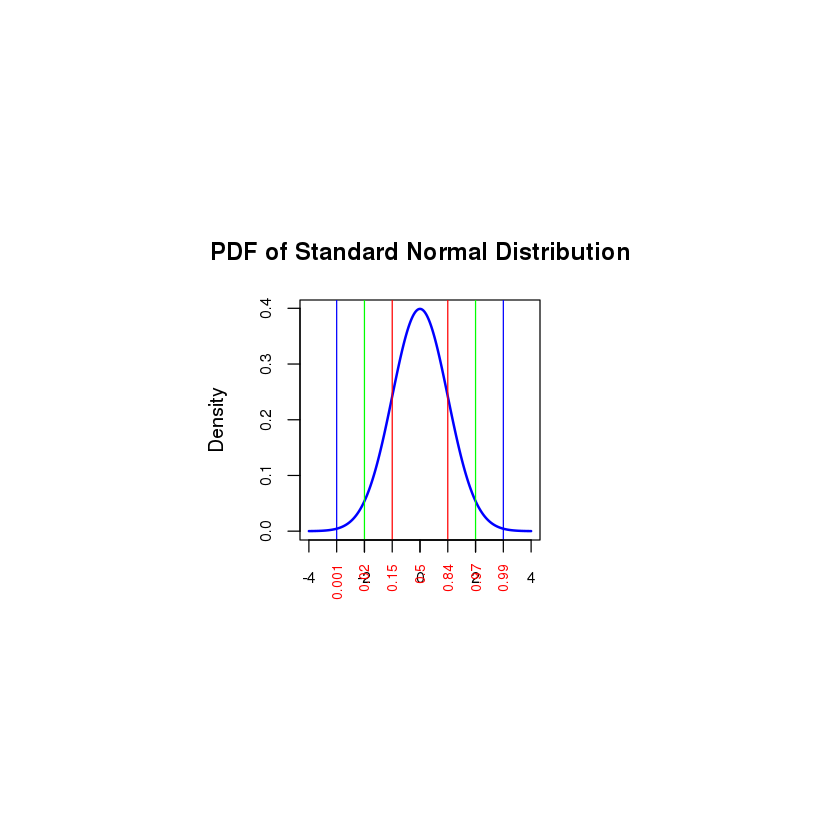

In [4]:
# Setting the size of the plot to 2" by 2" . 
par(pin=c(2,2))

plot(sequence, # Plotting the values (-4,-3.99,-3.98,...,3.98,3.99,4) on x axis
     densities, # Plotting the corresponding probability densities of the values (-4,-3.99,-3.98,...,3.98,3.99,4) on y axis
     col="blue",xlab="", ylab="Density", type="l",lwd=2, cex=2,  
     main="PDF of Standard Normal Distribution", cex.axis=.8)

#Vertical lines at standard deviations of 1,2,3 from mean 
abline(v=c(-1,1),col=('red')) # Draw a vertical line at standard deviation of 1
abline(v=c(-2,2),col=('green')) # Draw a vertical line at standard deviation of 2
abline(v=c(-3,3),col=('blue'))  # Draw a vertical line at standard deviation of 3
axis(1, at=c(-3,-2,-1,0,1,2,3), 
     labels=c(0.001,0.02,0.15,0.5,0.84,0.97,0.99), # The labels {0.001,0.02,0.15,0.5,0.84,0.97,0.99} represent the areas under 
                                                   # normal curve before each value.          
     las=2,col.axis="red",cex.axis=0.7)

In [5]:
#Probabilities of numbers on the left tail of the distribution 
pnorm(-(1:3))

[1] 0.158655254 0.022750132 0.001349898

When you substract the areas of probability on left tail with that of right tail, you will see why the values of the distribution fall within the proportions of 68.2-95.4-99.7

In [6]:
pnorm(1:3) - pnorm(-(1:3))

[1] 0.6826895 0.9544997 0.9973002

**Question: ** A random experiment consist of a person taking an IQ test. Let X be the score on the test. The test scores have a mean of 100 and a standard deviation of 15. What is P(85 ≤ X ≤ 115)?


**Solution:** We need to find the area on the normal curve where this scores will fall. The limits 85 and 115 fall exactly one standard deviation (below and above, respectively) from the mean of 100. The answer is therefore approximately 68%. So the probability that the person getting a score between 85 and 115 is 68%. 

**qnorm() **

Given a set of values it returns the height of the probability distribution at each point. If you only give the points it assumes you want to use a mean of zero and standard deviation of one. Simply put, it gives the value at which the CDF of the standard normal curve is at given value.

**Question: ** Continuing with our previous example of IQ, what is the lowest possible IQ score that a person can have and still be in the top 1% of all IQ scores?

**Solution: ** we are looking for QX(0.99), where X ∼ norm(mean =100, sd = 15). 

In [7]:
#Below function should return distribution value at given probability.
qnorm(0.99, mean = 100, sd = 15)

[1] 134.8952

So the answer is approximately 134.8952. A person with this IQ score or higher falls in the top 1% of all IQ scores

### Normal distribution as an approximation for the binomial distribution

**Binomial distributions**

When you flip a coin, there are two possible outcomes: heads and tails. Each outcome has a fixed probability of 1/2, the same from trial to trial. We consider probability distributions for which there are just two possible outcomes with fixed probabilities summing to one. These distributions are called binomial distributions.

The formula we use for calculating probabilities in a binomial distribution is given below, (note that the "!" means "factorial", which is a number multiplied by the progressive reduction of itself down to 1 ... such that 3! is 3 x 2 x 1 = 6 and 2! is 2 x 1 = 2)

<img src='../images/binomial_formula.gif'>

where P(x) is the probability of x successes out of N trials, N is the number of trials, and π is the probability of success on a given trial. Applying this to the coin flip example,

<img src='../images/binomial2.gif'>

image src: http://onlinestatbook.com/2/probability/binomial.html

We toss a coin 12 times. What is the probability that we get from 0 to 3 heads? The answer is found by computing the probability of exactly 0 heads, exactly 1 head, exactly 2 heads, and exactly 3 heads. The probability of getting from 0 to 3 heads is then the sum of these probabilities. The probabilities are: 0.0002, 0.0029, 0.0161, and 0.0537. The sum of the probabilities is 0.073. The calculation of cumulative binomial probabilities can be quite tedious. Abraham de Moivre, an 18th century statistician noted that when the number of events (coin flips) increased, the shape of the binomial distribution approached a very smooth curve. The curve he discovered is now called the "normal curve."



Assume you have a fair coin and wish to know the probability that you would get 8 heads out of 10 flips. The binomial distribution has a mean of $\mu$ = Nπ = (10)(0.5) = 5 and a variance of $\sigma^2$ = Nπ(1-π) = (10)(0.5)(0.5) = 2.5. The standard deviation $\sigma$ is therefore 1.5811. 

    8 - no of heads

    5 - mean of the population

    1.5811 - SD of pulation

A total of 8 heads is (8 - 5)/1.5811 = 1.897 standard deviations above the mean of the distribution. 

The question then is, "What is the probability of getting a value exactly 1.897 standard deviations above the mean?" You may be surprised to learn that the answer is 0: The probability of any one specific point is 0 on a continous distribution.

The solution is to round off and consider any value from 7.5 to 8.5 to represent an outcome of 8 heads. Using this approach, we figure out the area under a normal curve from 7.5 to 8.5

<img src='../images/normal_binom_p.gif'>

In [ ]:
# There are two ways to find the area under a curve
    # a) Using a table of the standard normal distribution (a Z table)
    # b) Using pnormGC() function as shown below

# Find z-score to find out the area
#Z score for 8.5
Z1 = (8.5 - 5)/1.5811
Z1

#Z score for 7.5
Z2 = (7.5 - 5)/1.5811
Z2

**Reference**: <a href="../images/zscoretable.pdf">click here for z-score table</a>

In [ ]:
# Area below Z1 of 2.21 using pnormGC function

library(tigerstats) # tigerstats
pnormGC(8.5,region="below",mean=5,
        sd=1.5811,graph=FALSE)

#Area below Z2 of 1.58
pnormGC(7.5,region="below",mean=5,
        sd=1.5811,graph=FALSE)

In [ ]:
#Subtract the area of Z2 from the value of Z1
0.986573523658572-0.943081289204437

The area 0.043492234454135 is an approximation of the probability of obtaining 8 heads.

The same logic applies when calculating the probability of a range of outcomes. For example, to calculate the probability of 7 to 10 flips, calculate the area from 7.5 to 10.5.

**Reference: ** [pnormGC()](https://cran.r-project.org/web/packages/tigerstats/vignettes/pnormGC.html)

**Reference: ** [tigerstats package](https://cran.r-project.org/web/packages/tigerstats/vignettes/instructorNotes.html)

###  Binomial Distribution

The binomial distribution is based on a Bernoulli trial(Binomial trial), which is a random experiment in which there are only two possible outcomes: success (S ) and failure (F). We conduct the Bernoulli trial and let

\begin{gather*}     
X =
\begin{cases}
1 & \text {if the outcome is S ,}\\
0 & \text {if the outcome is F.}\\
\end{cases}
\end{gather*}

If the probability of success is p then the probability of failure must be 1 − p = q and the PMF of X is

$fx(X) = p^x(1 − p)^{1−x} $,                  x = 0, 1.


#### The Binomial Model

The Binomial model has three defining properties:
    
    • Bernoulli trials are conducted n times,
    • the trials are independent,
    • the probability of success p does not change between trials.

If X counts the number of successes in the n independent trials, then the PMF of X is

$fx(x) =\sum_{x=0}^{n} {{n}\choose{x}}px(1 − p)^{n−x}$, x = 0, 1, 2, . . . , n

#### How to replicate the same in R

The corresponding R function for the PMF and CDF for binomial distribution are dbinom and pbinom, respectively. We demonstrate their use in the following examples.

Example: Roll 12 dice simultaneously, and let X denote the number of 6’s that appear. We wish to find the probability of getting seven, eight, or nine 6’s. If we let S = { get a 6 on one roll },then P(S ) = 1/6 and the rolls constitute Bernoulli trials; thus X ∼ binom(size =12, prob =1/6) and our task is to find P(7 ≤ X ≤ 9). This is just

$P(7 ≤ X ≤ 9) = \sum_{x=7}^{9} {{9}\choose{7}}(1/6)^x(5/6)^{12−x}$


P(7 ≤ X ≤ 9) = P(X ≤9) − P(X ≤ 6) = FX(9) − FX(6),

In [ ]:
pbinom(9, size=12, prob=1/6) - pbinom(6, size=12, prob=1/6)

**Example:** Toss a coin three times and let X be the number of Heads observed. We know from before that X ∼ binom(size = 3, prob = 1/2) which implies the following PMF:

x = # of Heads   |  0   1   2   3
----------------|-----------------
f(x) = IP(X = x)| 1/8 3/8 3/8 1/8

In [ ]:
# install.packages("distr",repo="https://cran.cnr.berkeley.edu/")
library(distr)
x <- Binom(size = 3, prob = 1/2)
x

In [ ]:
paste(d(x)(0),',', d(x)(1),',', d(x)(2),',',d(x)(3)) # pmf of X evaluated at x = 0,1,2,3

In [ ]:
paste(p(x)(0),',', p(x)(1),',', p(x)(2),',',p(x)(3)) # cdf of X evaluated at x = 0,1,2,3